![image](microsoft_logo.jpeg)

# Microsoft Movie Studio
#### Business Recommendations 

**Authors:** Valeria Viscarra Fossati, Olgert Hasko, Sally Heinzel, Czarina Luna 

##### December 2021

***


## Overview

Microsoft is creating a new movie studio. As it prepares to create original video content, it seeks to understand the film industry. We, the advisory team, explored movie production data to help Microsoft successfully launch its first film. We started by conducting a web scrape to extract two datasets containing all the relevant film information. We then merged our datasets and cleaned our data by turning certain strings into floats, adjusting dates to show more details, removing Null values, and adding a column for the rate of return based on the production budget and box office returns. Once the data was clean, we created plots to determine which genres had the highest rate of return, which release dates yielded the highest revenue by genre, and which runtimes were optimal for each genre. Based on the data, we determined that horror films yielded the highest rate of return. The best month to release a horror film is October, and the most optimal film length is 96 minutes.

## Business Problem

The advisory team will examine which movies did well at the box office, which ones did not, and which features contributed to the film's successes or losses. To guide our analysis, we asked the following questions:
1. Is there a correlation between production budget and box office return?
2. What are the highest grossing genres?
3. Which genre returns the highest investment?
4. What is the best time to release a movie?
5. How long should the film be?


Using data from The Numbers, a premiere movie industry data and research service, we describe patterns in profitable movies to aid Microsoft in launching a movie studio that will be successful starting on its opening night.

## Data Understanding

The advisory team extracted movie production data by scraping the online database of The Numbers, a premiere movie industry data and research service. The data set contains a total of 6,100 films ranging over almost a hundred years, including films release this year. 

It consists of the following variables: 
- the budget and gross figures to be used in finding profits and losses; 
- the genres to be compared with one another; 
- the release date to be sliced into day, month, and quarter of the years; 
- and the runtime in minutes to compare longer and shorter films. 

Given the domestic gross and worldwide gross, we will use the worldwide box office earnings to analyze the correlation between production budget and overall gross.

***

We imported the Python libraries required for the data analysis.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the datasets

df1 = pd.read_csv("data/tngross.csv")
df2 = pd.read_csv("data/tnproduction.csv")

In [3]:
df1.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,3,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4,"Apr 25, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,044,540,523"


In [4]:
df1.tail()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
6095,6095,"Mar 17, 2015",Closure,"$100,000",$0,$0
6096,6096,"Aug 29, 2015",Lunch Time Heroes,"$100,000",$0,$0
6097,6097,"Mar 25, 2015",Open Secret,"$100,000",$0,$0
6098,6098,"Nov 10, 2015",The Night Visitor,"$100,000",$0,$0
6099,6099,"Jul 7, 2015",Tiger Orange,"$100,000",$0,$0


In [5]:
df2.head()

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
0,0,181 minutes,Action,Marvel Studios,United States
1,1,136 minutes,Adventure,Walt Disney Pictures,United States
2,2,141 minutes,Action,Marvel Studios,United States
3,3,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,4,156 minutes,Action,Marvel Studios,United States


In [6]:
df2.tail()

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
6095,6095,90 minutes,Drama,None,United States
6096,6096,88 minutes,Adventure,Phebean Films,Nigeria
6097,6097,None,Documentary,None,United States
6098,6098,None,Horror,None,United States
6099,6099,81 minutes,Drama,None,United States


## Data Preparation

### Merging Datasets
First, we merge the datasets on column "Unnamed: 0" to match the movies from the first dataset to the additional information on the second dataset. Then we dropped the same column and used the merged data frame’s index.

In [7]:
df = df1.merge(df2, on="Unnamed: 0")

In [8]:
df = df.drop("Unnamed: 0", axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6100 entries, 0 to 6099
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   release_date        6100 non-null   object
 1   movie               6100 non-null   object
 2   production_budget   6100 non-null   object
 3   domestic_gross      6100 non-null   object
 4   worldwide_gross     6100 non-null   object
 5   runtime_minutes     6100 non-null   object
 6   genres              6100 non-null   object
 7   production_company  6100 non-null   object
 8   production_country  6100 non-null   object
dtypes: object(9)
memory usage: 476.6+ KB


### Check for Duplicates

After combining the data sets we wanted to verify if the duplicate movie names were movies that were movie remakes or if the data was repeating.  The duplicate movie names were not duplicate values but movie remakes. 


In [10]:
duplicate_df = df[df['movie'].duplicated(keep=False)]
duplicate_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
13,"Jul 11, 2019",The Lion King,"$260,000,000","$543,638,043","$1,654,367,425",118 minutes,Adventure,"Walt Disney Pictures, Fairview Entertainment",United States
27,"Apr 25, 2012",The Avengers,"$225,000,000","$623,357,910","$1,515,100,211",143 minutes,Action,"Marvel Studios, Paramount Pictures",United States
40,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",139 minutes,Action,"United Artists, Fairbanks","United Kingdom, United States"
41,"Dec 14, 2005",King Kong,"$207,000,000","$218,080,025","$550,517,357",189 minutes,Adventure,Wingnut Films,"New Zealand, United States"
54,"Mar 4, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110",108 minutes,Adventure,"Walt Disney Pictures, Roth Films, Zancuk Company",United States
...,...,...,...,...,...,...,...,...,...
6056,"Mar 1, 2002",The Calling,"$160,000","$32,092","$32,092",None,Drama,None,None
6066,"Oct 18, 1974",The Texas Chainsaw Massacre,"$140,000","$26,572,439","$26,572,439",83 minutes,Horror,None,United States
6069,"Nov 16, 1942",Cat People,"$134,000","$4,000,000","$8,000,000",73 minutes,Drama,None,United States
6077,"Oct 1, 1968",Night of the Living Dead,"$114,000","$12,087,064","$30,087,064",96 minutes,Horror,None,United States


In [11]:
# Check if there are duplicated names of movies with the same dates of release

duplicate_df[duplicate_df.duplicated(subset=['movie','release_date'], keep=False)]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country


### Converting Data Types
The next step was to convert the release date from a  string to a date-time format.  We then updated the columns that had dollar signs to remove “$” and “,” before changing the string values to integers.


In [12]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', format='%b %d, %Y')

In [13]:
# Create a function to change the format of the dollar amount values

def dollar_to_int(column):
    return column.str.replace('$', '').str.replace(',', '').map(int)

df[['production_budget', 'domestic_gross', 'worldwide_gross']] = df[['production_budget', 'domestic_gross', 'worldwide_gross']].apply(dollar_to_int)

In [14]:
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,141 minutes,Action,Marvel Studios,United States
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,156 minutes,Action,Marvel Studios,United States


### Data Cleaning
Once the values in the worldwide gross were converted to integers, we removed the 0 values because the 0 values in the column were due to no data being available. Without a value in this column, we could not calculate a movie’s earnings and therefore we removed those rows. There were 353 rows eliminated through this step.

In [15]:
df[(df['worldwide_gross']==0)]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
218,2022-02-03,Moonfall,150000000,0,0,None,Action,"Centropolis Entertainment, Street Entertainmen...",United States
243,2022-05-27,Top Gun: Maverick,140000000,0,0,None,Action,"Jerry Bruckheimer Films, Skydance Productions,...",United States
441,2020-06-12,Artemis Fowl,100000000,0,0,115 minutes,Adventure,"Walt Disney Pictures, Tribeca Film",United States
520,2017-12-13,Bright,90000000,0,0,117 minutes,Thriller/Suspense,None,United States
521,2021-05-14,Army of the Dead,90000000,0,0,148 minutes,Action,"Stone Quarry, Netflix",United States
...,...,...,...,...,...,...,...,...,...
6095,2015-03-17,Closure,100000,0,0,90 minutes,Drama,None,United States
6096,2015-08-29,Lunch Time Heroes,100000,0,0,88 minutes,Adventure,Phebean Films,Nigeria
6097,2015-03-25,Open Secret,100000,0,0,None,Documentary,None,United States
6098,2015-11-10,The Night Visitor,100000,0,0,None,Horror,None,United States


In [16]:
df = df[~(df['worldwide_gross']==0)]

### Adding Columns
Once the data was cleaned, we added 2 new columns: one to show each movie’s earnings as a dollar value and another to show its return on investment.

In [17]:
df['earnings'] = df["worldwide_gross"] - df["production_budget"]
df['earnings_ratio'] = df["worldwide_gross"] / df["production_budget"]
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,earnings,earnings_ratio
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,141 minutes,Action,Marvel Studios,United States,1030316979,3.822786
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,136 minutes,Adventure,"Lucasfilm, Bad Robot",United States,1758615817,6.747111
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2044540523,156 minutes,Action,Marvel Studios,United States,1744540523,6.815135


### Creating New Data Frames to Prepare for Analysis 
Once the data was cleaned and the new columns were created, we extracted the columns for each analysis.

The first step of the analysis was to create a new dataset that compared the production budget to earnings.  We extracted the fields that related to cashflows for our analysis.

In [18]:
movie_cash_flow = df[["movie", "production_budget", "worldwide_gross", "domestic_gross", "earnings", "earnings_ratio"]]
movie_cash_flow.head(2)

,movie,production_budget,worldwide_gross,domestic_gross,earnings,earnings_ratio
0,Avengers: Endgame,400000000,2797800564,858373000,2397800564,6.994501
1,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,241071802,666713802,2.759139


***
The second step was to create a dataset for analysis of earnings by genre.  We removed the ‘None’ values from the dataset, and also the genres with extremely low value counts.

In [19]:
df['genres'].value_counts()

Drama                  1556
Comedy                  960
Action                  736
Adventure               688
Thriller/Suspense       573
Horror                  455
Romantic Comedy         251
None                    128
Documentary             111
Black Comedy            102
Musical                 101
Western                  71
Concert/Performance      13
Multiple Genres           2
Name: genres, dtype: int64

In [20]:
genres_df = df[df.genres != 'None']
genres_df = genres_df[genres_df['genres']!='Multiple Genres']
genres_df = genres_df[genres_df['genres']!='Concert/Performance']
genres_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,earnings,earnings_ratio
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139


***
The third dataset needed for our analysis focused on the dates when movies were released compared to earnings.  We dropped rows with missing dates from the data set.

In [21]:
dates_df = df[~df['release_date'].isna()]
dates_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,earnings,earnings_ratio
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139


***
The fourth dataset was used to compare the runtime of the movies to see if there was a correlation between runtime and earnings. Rows where the runtime was “None” were dropped.

In [22]:
runtime_df = df[(df['runtime_minutes'] != 'None')]
runtime_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,earnings,earnings_ratio
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139


## Data Analysis

# >>> Write text here

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

# >>> Write comments in our codes below

### Is there a correlation between production budget and box office return?

In [23]:
movie_cash_flow['production_budget'].mean()

33522829.320689056

In [24]:
movie_cash_flow['production_budget'].corr(movie_cash_flow['earnings'])

0.602849302864861

In [25]:
# Separate the movies that earned a profit versus those that did not

movie_cash_flow_earners = movie_cash_flow[movie_cash_flow["earnings"] > 0]
movie_cash_flow_losers = movie_cash_flow[movie_cash_flow["earnings"] < 0]

In [26]:
losers = movie_cash_flow_losers['production_budget'].corr(movie_cash_flow_losers['earnings'])
winners = movie_cash_flow_earners['production_budget'].corr(movie_cash_flow_earners['earnings'])
print(f'The correlation between budget and losses is {losers}.')
print(f'The correlation between budget and earnings is {winners}.')

The correlation between budget and losses is -0.6778293629215483.
The correlation between budget and earnings is 0.6446713860187766.


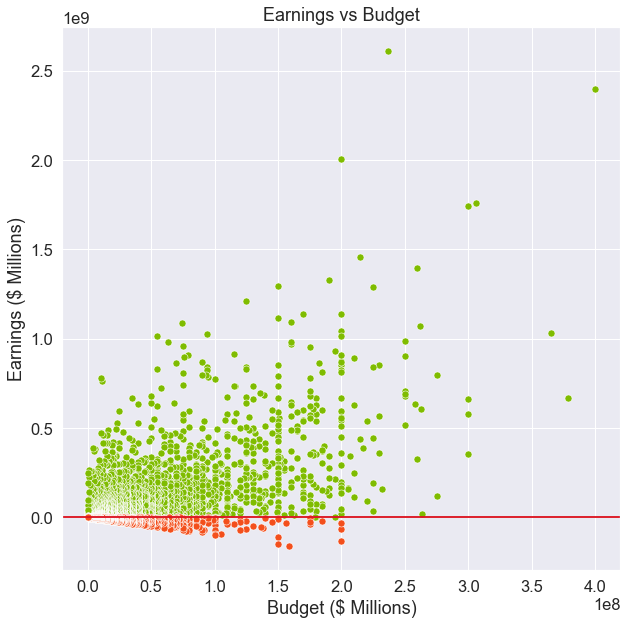

In [27]:
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)

fig, ax = plt.subplots()

graph1 = sns.scatterplot(
    x=movie_cash_flow_earners['production_budget'], 
    y= movie_cash_flow_earners["earnings"],
    color='#7FBC00',
    s=50)
graph2 = sns.scatterplot(
    x=movie_cash_flow_losers['production_budget'], 
    y= movie_cash_flow_losers["earnings"], 
    color='#F34F1C',
    s=50)
graph1.axhline(1)
plt.xlabel('Budget ($ Millions)')
plt.ylabel('Earnings ($ Millions)')
plt.title('Earnings vs Budget')
ax.axhline(y=1, color= "red")
fig.set_size_inches(10,10)
plt.show()

# >>> Edit text below if needed
There is a correlation between production budget and earnings, but not a strong correlation. The horizontal line divides the data points between movies that earned profits and those that did not.

### What are the highest grossing genres?

In [28]:
gains_genres_df = genres_df.loc[genres_df['earnings_ratio'] >= 1]
gains_genres_df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,earnings,earnings_ratio
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,6.994501
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States,666713802,2.759139


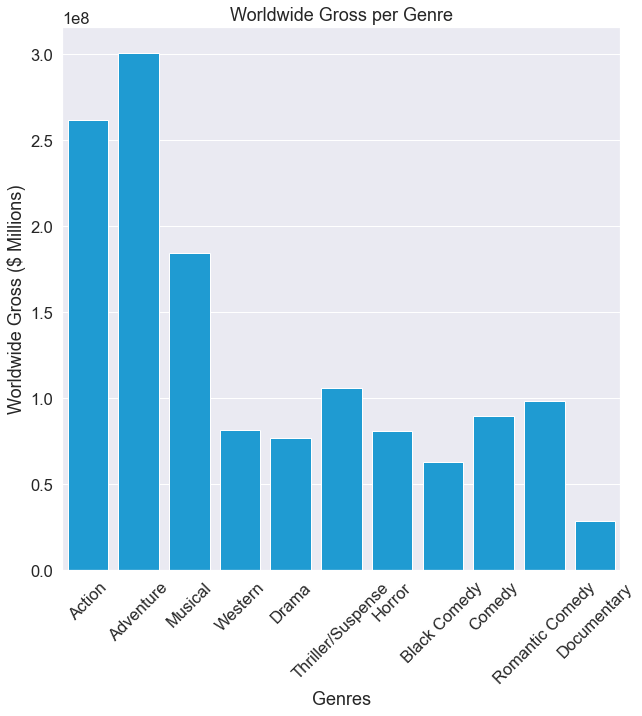

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(
    x="genres", 
    y="worldwide_gross",
    data=gains_genres_df,
    color='#01A6F0',
    ci=None)

plt.xticks(rotation=45)
plt.xlabel('Genres')
plt.ylabel('Worldwide Gross ($ Millions)')
plt.title('Worldwide Gross per Genre')
plt.ticklabel_format(axis="y", style="sci")

plt.show()

As shown by the plot above, the genre Action has the largest box office return. However, given the difference in budget needed to produce different film genres, we decided to use the ratio for a more accurate depiction of profitability.

### What genre returns the highest investment?

In [30]:
# Find the average of earnings ratio by genre using the mean

all_mean_df = genres_df.groupby("genres", as_index=False)["earnings_ratio"].mean()
all_mean_df.sort_values("earnings_ratio", ascending=False)

,genres,earnings_ratio
6,Horror,11.411487
7,Musical,6.849120
4,Documentary,5.713746
10,Western,4.379252
1,Adventure,4.116338
8,Romantic Comedy,3.869508
5,Drama,3.787328
0,Action,3.727429
3,Comedy,3.557024
9,Thriller/Suspense,2.930738


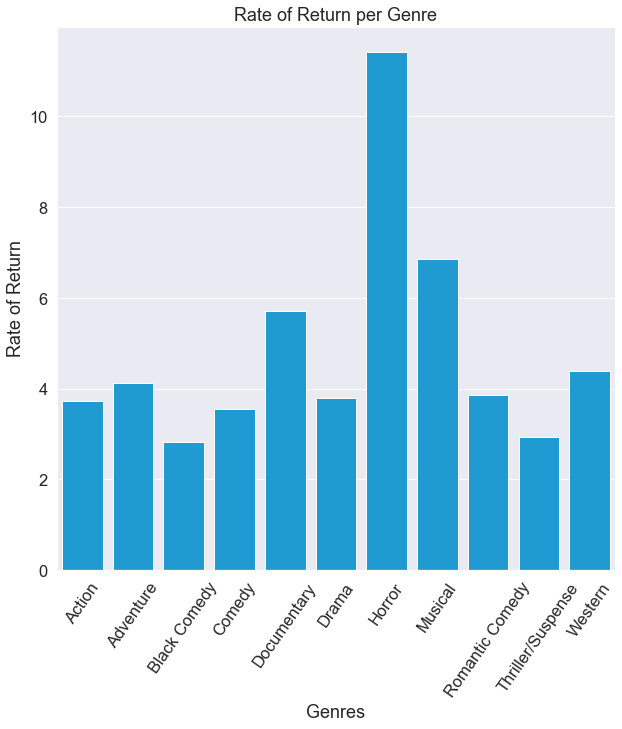

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.barplot(
    x="genres", 
    y="earnings_ratio",
    color="#01A6F0",
    data = all_mean_df)
plt.title("Rate of Return per Genre")
plt.xlabel("Genres")
plt.ylabel("Rate of Return")

plt.xticks(rotation=55)
plt.ticklabel_format(axis="y", style="plain")

plt.show()

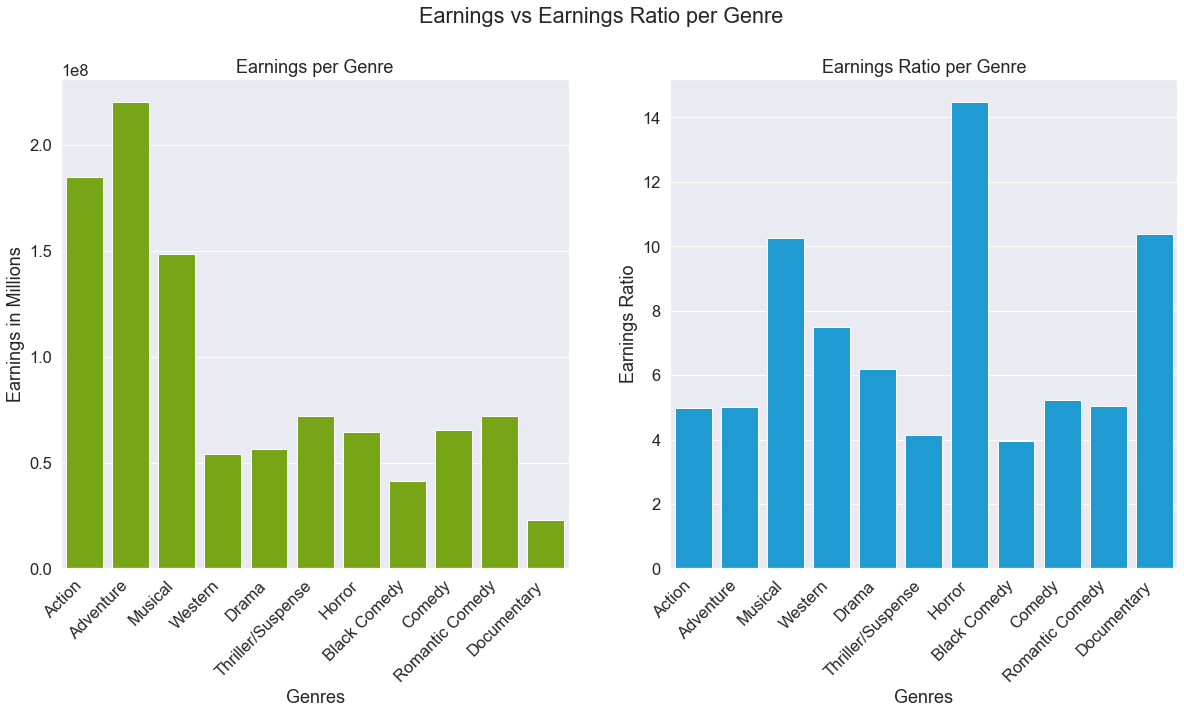

In [54]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
fig.suptitle('Earnings vs Earnings Ratio per Genre')
fig.autofmt_xdate(rotation=45)

sns.barplot(
    data=gains_genres_df, 
    x='genres', 
    y="earnings_ratio", 
    color='#01A6F0', 
    ci=None, 
    ax=axes[1])

sns.barplot(
    data=gains_genres_df, 
    x="genres", 
    y="earnings", 
    color='#7FBC00', 
    ci=None, 
    ax=axes[0])

axes[1].set_title('Earnings Ratio per Genre')
axes[1].set_xlabel('Genres')
axes[1].set_ylabel('Earnings Ratio')


axes[0].set_title('Earnings per Genre')
axes[0].set_xlabel('Genres')
axes[0].set_ylabel('Earnings in Millions')

plt.savefig('graph4.png')
plt.show()

# >>> Write interpretation here

### What is the best time to release a movie?

In [33]:
dates_df['day'] = dates_df['release_date'].dt.dayofweek
dates_df['month'] = pd.DatetimeIndex(dates_df['release_date']).month

<ipython-input-33-2302b0096137>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['day'] = dates_df['release_date'].dt.dayofweek
<ipython-input-33-2302b0096137>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['month'] = pd.DatetimeIndex(dates_df['release_date']).month


In [34]:
# Add columns to categorize movies that are profitable, and those that are not

dates_df['category'] = 'Profitable'
dates_df.loc[dates_df['earnings_ratio'] < 1, 'category'] = 'Non-Profitable'

<ipython-input-34-d7bad2f57e46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates_df['category'] = 'Profitable'
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


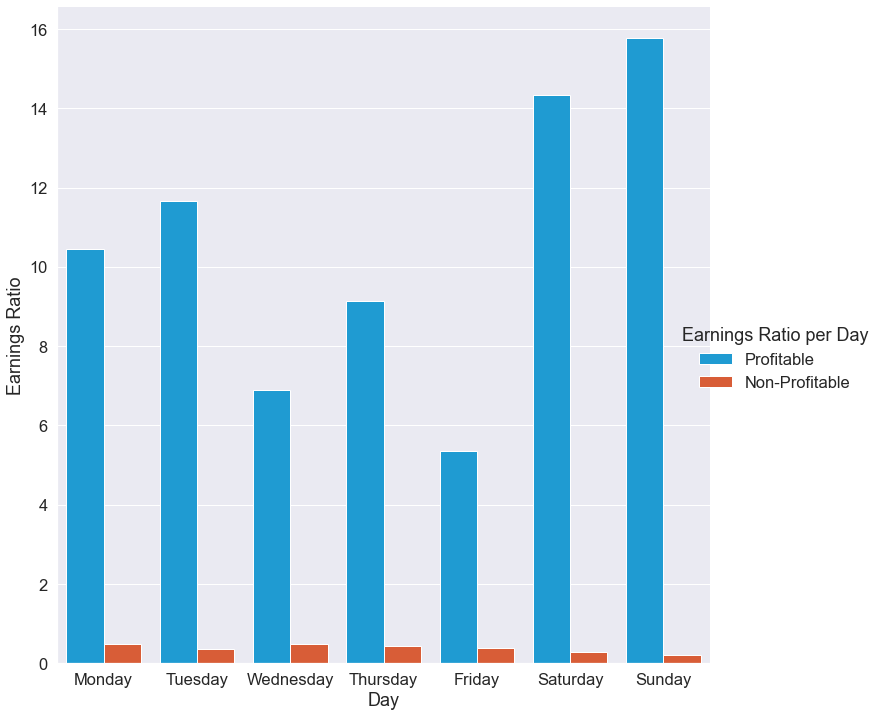

In [61]:
ax = sns.catplot(
    data=dates_df, kind="bar",
    x="day", y="earnings_ratio", hue="category",
    ci=None, height=10,
    palette=sns.color_palette(['#01A6F0', '#F34F1C'])
)

ax.set_axis_labels("Day", "Earnings Ratio")
ax.legend.set_title("Earnings Ratio per Day")

plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.savefig('graph5.png')
plt.show()

The top profitable movies were released on Sunday, followed by Saturday. This is in contrast with the non-profitable movies, which were released more on weekdays than weekend. See the graph below for a closer look.

In [36]:
loss_dates_df = dates_df.loc[dates_df['earnings_ratio'] < 1]

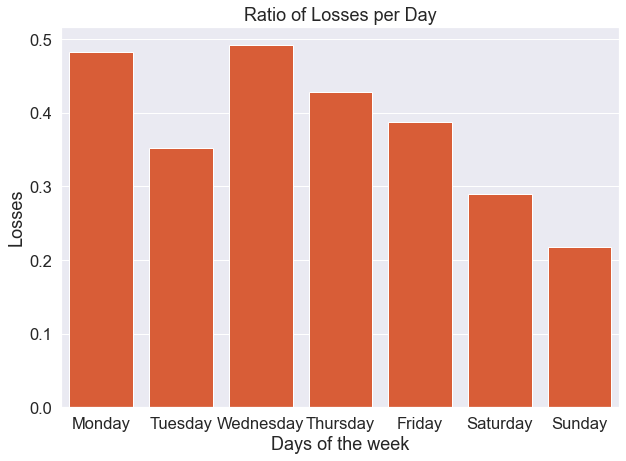

In [37]:
# Compare the ratio of earnings by day of the week with this plot showing the non-profitable movies' release day

plt.figure(figsize=(10,7))

sns.barplot(
    x="day", 
    y="earnings_ratio",
    data=loss_dates_df,
    color='#F34F1C',
    ci=None)

plt.xlabel('Days of the week')
plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylabel('Losses')
plt.title('Ratio of Losses per Day')

plt.show()

Let's dive in to horror movies, the top genre that yielded the highest rate of returns.

In [38]:
gains_dates_df = dates_df.loc[dates_df['earnings_ratio'] >= 1]

In [39]:
horror_dates_df = gains_dates_df.loc[gains_dates_df['genres'] == 'Horror']

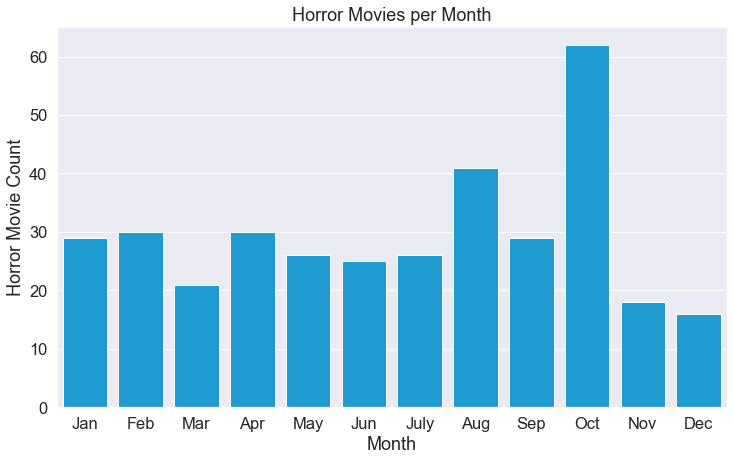

In [60]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.countplot(
    x="month", 
    color="#01A6F0",
    data = horror_dates_df,)
plt.title("Horror Movies per Month")
plt.xlabel("Month")
plt.ylabel("Horror Movie Count")

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])

plt.savefig('graph7.png')
plt.show()

Among the profitable horror movies, the most popular month of release date was October. This is in contrast with the non-profitable horror movies' release month topped by September, one month earlier.

In [41]:
horror_loss_df = loss_dates_df[loss_dates_df['genres'] == 'Horror']

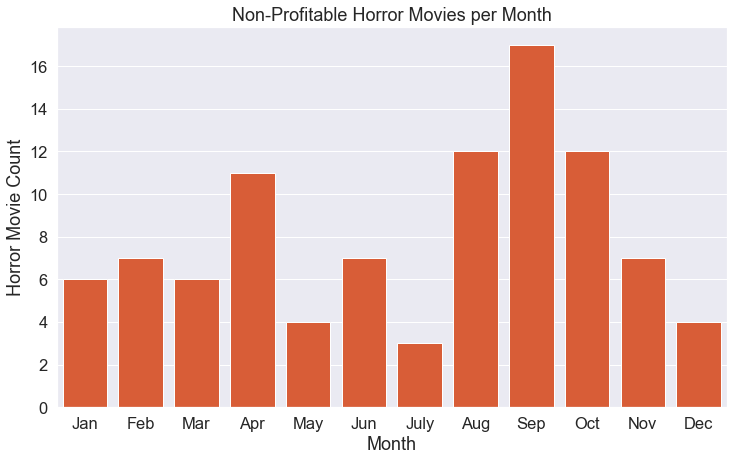

In [42]:
fig, ax = plt.subplots(figsize=(12,7))

sns.countplot(
    x="month", 
    color="#F34F1C",
    data = horror_loss_df,)
plt.title("Non-Profitable Horror Movies per Month")
plt.xlabel("Month")
plt.ylabel("Horror Movie Count")

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])

plt.show()

## How long should the film be?

In [43]:
runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].str.replace('minutes', '')
runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].astype(int)

<ipython-input-43-a4ad548bebaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].str.replace('minutes', '')
<ipython-input-43-a4ad548bebaf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtime_df['runtime_minutes'] = runtime_df['runtime_minutes'].astype(int)


In [44]:
runtime_df['genres'].value_counts()

Drama                  1236
Comedy                  787
Action                  651
Adventure               634
Thriller/Suspense       507
Horror                  397
Romantic Comedy         205
Black Comedy             81
Musical                  81
Documentary              77
Western                  62
None                     40
Concert/Performance      13
Multiple Genres           2
Name: genres, dtype: int64

We removed the genres with less than 50 values.

In [45]:
runtime_df = runtime_df.loc[(runtime_df['genres'] != 'Concert/Performance') & 
                            (runtime_df['genres'] != 'None') & 
                            (runtime_df['genres'] != 'Multiple Genres')]

In [46]:
runtime_df.describe()

,production_budget,domestic_gross,worldwide_gross,runtime_minutes,earnings,earnings_ratio
count,4.718000e+03,4.718000e+03,4.718000e+03,4718.000000,4.718000e+03,4718.000000
mean,3.791222e+07,5.189427e+07,1.161069e+08,109.245443,7.819465e+07,4.798698
std,4.519174e+07,7.548228e+07,1.985386e+08,19.742007,1.681823e+08,17.410292
min,1.000000e+05,0.000000e+00,1.700000e+01,41.000000,-1.580898e+08,0.000002
25%,9.000000e+06,5.963404e+06,1.258305e+07,95.000000,-7.321238e+05,0.888601
50%,2.200000e+07,2.684756e+07,4.527922e+07,106.000000,2.058394e+07,2.146884
75%,5.000000e+07,6.502514e+07,1.318375e+08,120.000000,8.491387e+07,4.256127
max,4.000000e+08,9.366622e+08,2.845900e+09,260.000000,2.608900e+09,498.750000


Here we can see that the mean runtime for all the movies in our dataset is 109 minutes. Next, we'll check to see if there's a correlation between the runtime of movies and its profitability.

In [47]:
#Calculate correlation of movie runtime and profitability

runtime_df['runtime_minutes'].corr(runtime_df['earnings_ratio'])

-0.02928590650761622

There's a negative correlation between movie profitability and runtime (longer movies are less profitable and shorter movies are more profitable), but it's a weak correlation. To dig in a bit further, let's divide the data into 2 dataframes: one with movies that made a profit and one with movies that didn't make a profit. That way we can compare the runtimes between those two groups to get a better sense of their similarity or difference.

In [48]:
#Create two new data frames, one that only includes profitable movies and one that only includes unprofitable movies

profitable = runtime_df[runtime_df['earnings_ratio'] >= 1]
non_profitable = runtime_df[runtime_df['earnings_ratio'] < 1]

In [49]:
#Calculate correlation of movie runtime and profitability for both the profitable and non-profitable data frames
correlation_profitable = profitable['runtime_minutes'].corr(profitable['earnings_ratio'])
correlation_non_profitable = non_profitable['runtime_minutes'].corr(non_profitable['earnings_ratio'])

print(f'The correlation of movie runtime and profitability for profitable movies is: {correlation_profitable}.')
print(f'The correlation of movie runtime and profitability for non-profitable movies is: {correlation_non_profitable}.')

The correlation of movie runtime and profitability for profitable movies is: -0.04939102434021609.
The correlation of movie runtime and profitability for non-profitable movies is: 0.12106129303953622.


Profitable movies have a weak negative correlation between runtime and profitablity while non-profitable movies have a slighlty larger positive correlation. Based on this, it's best to stick with shorter, as opposed to longer, running times for a greater chance at a successful movie.

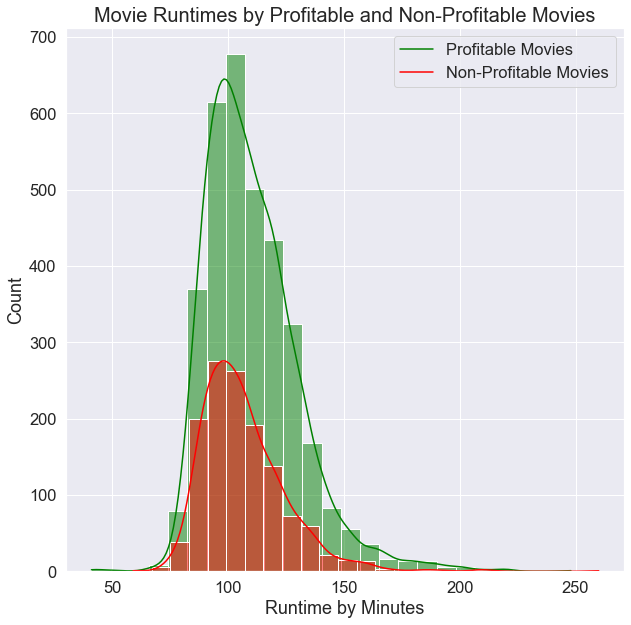

In [50]:
#Create a historgram with kde line of movie runtimes for both profitable movies and unprofitable movies

fig, ax = plt.subplots(figsize = (10,10))

sns.histplot(data=profitable, x="runtime_minutes", color="green", bins=25, kde=True)
plt.xlabel("Runtime by Minutes")
plt.title("Movie Runtimes by Profitable and Non-Profitable Movies", size=20)

sns.histplot(data=non_profitable, x="runtime_minutes", color="red", alpha=0.5, bins=25, kde=True)
plt.legend(labels=["Profitable Movies","Non-Profitable Movies"])

plt.show()

In [51]:
top_5_genres_by_medianprofit = runtime_df.groupby("genres", as_index=False).median().sort_values('earnings_ratio', ascending=False)[0:5]

top_5_genres_by_medianprofit.loc[:, ['genres', 'runtime_minutes']]

,genres,runtime_minutes
6,Horror,96.0
8,Romantic Comedy,104.0
7,Musical,113.0
1,Adventure,99.0
0,Action,112.0


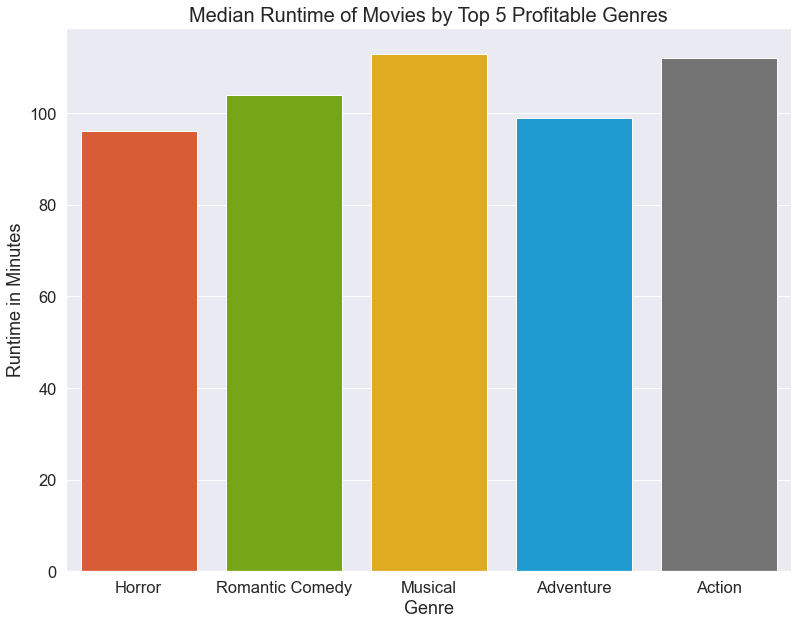

In [52]:
#Create bar graph showing median runtime of movies by genre
fig, ax = plt.subplots(figsize = (13,10))

sns.barplot(x='genres', y='runtime_minutes', data=top_5_genres_by_medianprofit,
           palette=sns.color_palette(['#F34F1C', '#7FBC00', '#FFBA01', '#01A6F0', '#747474']))

plt.xlabel("Genre")
plt.ylabel("Runtime in Minutes")
plt.title("Median Runtime of Movies by Top 5 Profitable Genres", size=20)

plt.show()

Since the runtimes of profitable and non-profitable movies don't vary that much, it's better to look at the median runtime of a specific genre. For the most profitable genre, horror, Microsoft should shoot for a runtime of 96 minutes.

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***